In [ ]:
# https://colab.research.google.com/drive/15wLjrKNeom-fRFrRhOxcctMIhyu7KCuT?usp=sharing [Turkish unemployment vs Ethereum]
# https://colab.research.google.com/drive/1MzvloCNAt5-CM5SZEo3VD0j7-_rURmKO?usp=sharing [Japanese unemployment vs Ethereum]
# https://colab.research.google.com/drive/11Gye86iq-VC_P0Kqi6Kugwi4N8yPwDNj?usp=sharing [German unemployment vs Ethereum]
# https://colab.research.google.com/drive/1FDYVuoh2C9-xllsGaFa8qCOoSRYARzTX?usp=sharing [American unemployment vs Bitcoin]
# https://colab.research.google.com/drive/15H_mxlBixvHXaeHxoEOgm5aIC52SzQRo?usp=sharing [Turkish unemployment vs Bitcoin]
# https://colab.research.google.com/drive/1aGzor-zQMet2B3rHQI8e6PKul6Ds2uob?usp=sharing [Japanese unemployment vs Bitcoin]
# https://colab.research.google.com/drive/1dh-THCgaedTrCTk5zQKpCuKk5ArPMOef?usp=sharing [German unemployment vs Bitcoin]
# https://colab.research.google.com/drive/1kfLspw29QGEPf7CA0ag2y6jruMiFDYQi?usp=sharing [American inflation vs Ethereum]
# https://colab.research.google.com/drive/1QWgitMVx7lwguaY4fgGkW5_sJJcg-nBt?usp=sharing [Turkish inflation vs Ethereum]
# https://colab.research.google.com/drive/19go4O4AaF_3SJJDliwohGWQCAfBUlPJH?usp=sharing [Japanese inflation vs Ethereum]
# https://colab.research.google.com/drive/1hgBUsyN-oNy4BwkVf4EZcgfLMjiKrQ-2?usp=sharing [German inflation vs Ethereum]
# https://colab.research.google.com/drive/1PbTrVlnn5juP-GHbuTtR8Sczk0W86-SK?usp=sharing [American inflation vs Bitcoin]
# https://colab.research.google.com/drive/1n9I9HnuyxeX4_UxUpTXqIX9-KTNnygkv?usp=sharing [Turkish inflation vs Bitcoin]
# https://colab.research.google.com/drive/1auVbTSCYUTFDlDQnvW9G4PmzgaQdWFU6?usp=sharing [Japanese inflation vs Bitcoin]
# https://colab.research.google.com/drive/11eUlV3pnBiJ5iNIclVkhpQ3qiwCqdhGQ?usp=sharing [German inflation vs Bitcoin]
# These are links to the other 15 Colab notebooks for the other regressions (all being the same format as below).

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import requests
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [ ]:
monthlyUnemployment=pd.read_csv('unemploymentOECD_monthly.csv')
monthlyUnemployment
usefulMonthlyUnemployment=monthlyUnemployment[['LOCATION','TIME','Value']]
# This selects only the useful columns in the downloaded dataset: the date, country and unemployment rate.

In [ ]:
url ='https://raw.githubusercontent.com/tm19784/tm19784.github.io/main/jsonFolder/rawPriceETH.json'
html = requests.get(url)
# This is a copy of the CoinAPI link returns when I specify that I want Ethereum's price in pounds every 10 days.
# I copied all of this information and uploaded it to my GitHub, then used this raw link.

In [ ]:
Ethereum_price_json = html.json()
ETH=pd.DataFrame(Ethereum_price_json)
ETH_useful=ETH[['time_close','price_close']]
ETH_useful
# This converts the data into a Pandas dataframe, then extracts the 'useful' columns: the time and price at market closure.

,time_close,price_close
0,2016-10-20T20:18:26.6010000Z,10.18478
1,2016-10-30T23:46:16.0410000Z,9.68622
2,2016-11-09T21:38:05.5430000Z,9.05000
3,2016-11-19T20:45:29.0350000Z,7.98496
4,2016-11-29T22:08:00.0360000Z,6.89169
...,...,...
184,2021-11-13T23:59:52.6350460Z,3470.13000
185,2021-11-23T23:59:55.6560050Z,3246.49000
186,2021-12-03T23:59:58.9420140Z,3193.87000
187,2021-12-13T23:59:58.8397000Z,2866.93000


In [ ]:
ETH_useful['time_close'] = pd.to_datetime(ETH_useful['time_close'])
ETH_useful
ETH_monthly = ETH_useful.set_index('time_close').resample('1M').mean().reset_index()
ETH_monthly
# The API can return 10-day or 1-year interval data, but has no parameter available to do this for one month.
# Hence I had to resample this data for one month (1M) periods, filling in the mean [mean()] price over that interval.
# This resampling function requires a time as the index, so I had to convert the closing time to 'datetime' and then set this as the index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,index,time_close,price_close
0,0,2016-10-31 00:00:00+00:00,9.935500
1,1,2016-11-30 00:00:00+00:00,7.975550
2,2,2016-12-31 00:00:00+00:00,6.709893
3,3,2017-01-31 00:00:00+00:00,8.442843
4,4,2017-02-28 00:00:00+00:00,10.676927
...,...,...,...
58,58,2021-08-31 00:00:00+00:00,2253.796667
59,59,2021-09-30 00:00:00+00:00,2480.560000
60,60,2021-10-31 00:00:00+00:00,2729.053333
61,61,2021-11-30 00:00:00+00:00,3360.006667


In [ ]:
usefulMonthlyUnemployment['TIME'] = pd.to_datetime(usefulMonthlyUnemployment['TIME'])
# This converts the dates in the OECD dataset into datetime format.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
USA_usefulMonthlyUnemployment = usefulMonthlyUnemployment[usefulMonthlyUnemployment['LOCATION'].str.contains('USA')]
USA_usefulMonthlyUnemployment.reset_index()
# I isolate the part of the sorted dataframe that has 'USA' in the 'LOCATION' column to only retrieve US data.

,index,LOCATION,TIME,Value
0,1995,USA,2015-09-01,5.0
1,1996,USA,2015-10-01,5.0
2,1997,USA,2015-11-01,5.1
3,1998,USA,2015-12-01,5.0
4,1999,USA,2016-01-01,4.8
...,...,...,...,...
70,2065,USA,2021-07-01,5.4
71,2066,USA,2021-08-01,5.2
72,2067,USA,2021-09-01,4.8
73,2068,USA,2021-10-01,4.6


In [ ]:
USA_ETH = USA_usefulMonthlyUnemployment[-62:].reset_index()[['LOCATION', 'TIME', 'Value']].join(ETH_monthly)
USA_ETH
# This new dataframe only takes the last 62 observations from the previous dataframe to make the dates line up with when the Ethereum data begins.
# The index also needs to be reset so the observations match up properly, and then this useless 'index' column is dropped.
# This dataframe now perfectly joins with the ETH_monthly dataframe, as there is no column with the same name.

,LOCATION,TIME,Value,index,time_close,price_close
0,USA,2016-10-01,4.9,0,2016-10-31 00:00:00+00:00,9.935500
1,USA,2016-11-01,4.7,1,2016-11-30 00:00:00+00:00,7.975550
2,USA,2016-12-01,4.7,2,2016-12-31 00:00:00+00:00,6.709893
3,USA,2017-01-01,4.7,3,2017-01-31 00:00:00+00:00,8.442843
4,USA,2017-02-01,4.6,4,2017-02-28 00:00:00+00:00,10.676927
...,...,...,...,...,...,...
57,USA,2021-07-01,5.4,57,2021-07-31 00:00:00+00:00,1519.460000
58,USA,2021-08-01,5.2,58,2021-08-31 00:00:00+00:00,2253.796667
59,USA,2021-09-01,4.8,59,2021-09-30 00:00:00+00:00,2480.560000
60,USA,2021-10-01,4.6,60,2021-10-31 00:00:00+00:00,2729.053333


In [ ]:
USA_ETH.rename(columns={'Value': 'USA_unemployment_rate'}, inplace=True)
USA_ETH.rename(columns={'price_close': 'ETH_closing_price'}, inplace=True)
# Here we rename the columns to names that are a bit more clearer.

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import seaborn as sns
sns.set()
# We have already imported many of these, but it does not harm to do it again just in case.

In [ ]:
USA_ETH_correlation = USA_ETH[['USA_unemployment_rate','ETH_closing_price']]
USA_ETH.to_csv('USA_ETH.csv')
USA_Ethereum_correlation = pd.read_csv('USA_ETH.csv')
# We extract only the unemployment rate and price from the dataframe, as after aligning dates they become irrelevant.
# We also download and re-read the dataframe as a CSV in case we want to work on our correlations externally.

[Text(0.5, 1.0, 'Regression of closing price of Ethereum on unemployment rate of USA')]

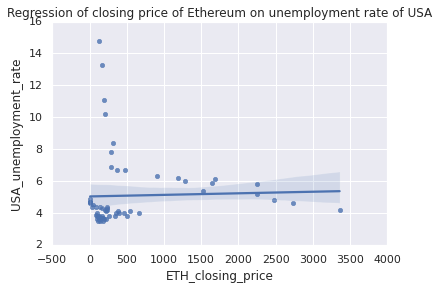

In [ ]:
sns.regplot(x='ETH_closing_price',y='USA_unemployment_rate',data=USA_Ethereum_correlation).set(title='Regression of closing price of Ethereum on unemployment rate of USA')
# This regplot shows a linear corrleation (and how poor this is when it is linear).

In [ ]:
from scipy.stats import linregress

In [ ]:
slope, intercept, rvalue, pvalue, stderr = linregress(x=USA_Ethereum_correlation.dropna()['ETH_closing_price'], y=USA_Ethereum_correlation.dropna()['USA_unemployment_rate'])

In [ ]:
regression_equation = print('y = ',np.round(slope,2),' * x + ',np.round(intercept,2))
regression_R2 = print('R² = ',np.round(rvalue**2,2))
#  This reinforces our intial thoughts about how a linear model in this context will not be very useful.

y =  0.0  * x +  5.03
R² =  0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


Text(0.5, 1.0, 'Relationship between Ethereum price and USA unemployment')

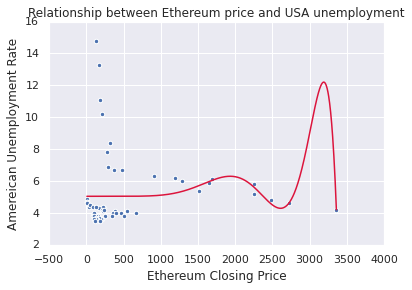

In [ ]:
x = USA_Ethereum_correlation.dropna()['ETH_closing_price']
y = USA_Ethereum_correlation.dropna()['USA_unemployment_rate']

poly_model = make_pipeline(PolynomialFeatures(11),
                           LinearRegression())
poly_model.fit(x[:, np.newaxis], y)
xfit = np.linspace(min(x), max(x), 1000)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit,color='crimson');
plt.xlabel('Ethereum Closing Price')
plt.ylabel('Amereican Unemployment Rate')
plt.title('Relationship between Ethereum price and USA unemployment')
# This creates a polynomial regression on top of a scatter plot to show a potential correlation between the stated x and y variables.
# After experimenting, a polynomial with 11 features is the one that fits this data best (thus is the one used).

In [ ]:
df_fitz = pd.DataFrame(xfit,yfit)
df_fitz.rename({'index':'yfit'}, inplace=True)
df_fitz_2 = df_fitz.reset_index()
df_fitz_2.rename(columns={'index':'yfit'}, inplace=True)
df_fitz_2.rename(columns={0:'xfit'}, inplace=True)
df_fitz_2
# Here we create a new dataframe that is the fitted values of the polynomial when there are 11 features.
# These are renamed for clarity, and represent what the model is predicting at each point on the crimson line.

,yfit,xfit
0,5.042203,6.709893
1,5.042203,10.066547
2,5.042203,13.423200
3,5.042203,16.779854
4,5.042203,20.136507
...,...,...
995,5.680505,3346.580053
996,5.329103,3349.936706
997,4.965223,3353.293360
998,4.588598,3356.650013


In [ ]:
Regression_output_table = pd.concat([USA_Ethereum_correlation, df_fitz_2])
Regression_output_table.head(85)
# We then concatonate the dataframe containing the x and y information, with that containing the xfit and yfit information.
# This is crucial as we can now plot the regession in Vega using layering, and can therefore make our polynomial regression interactive.

,Unnamed: 0,LOCATION,TIME,USA_unemployment_rate,index,time_close,ETH_closing_price,yfit,xfit
0,0.0,USA,2016-10-01,4.9,0.0,2016-10-31 00:00:00+00:00,9.935500,NaN,NaN
1,1.0,USA,2016-11-01,4.7,1.0,2016-11-30 00:00:00+00:00,7.975550,NaN,NaN
2,2.0,USA,2016-12-01,4.7,2.0,2016-12-31 00:00:00+00:00,6.709893,NaN,NaN
3,3.0,USA,2017-01-01,4.7,3.0,2017-01-31 00:00:00+00:00,8.442843,NaN,NaN
4,4.0,USA,2017-02-01,4.6,4.0,2017-02-28 00:00:00+00:00,10.676927,NaN,NaN
...,...,...,...,...,...,...,...,...,...
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.042203,67.129655
19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.042203,70.486308
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.042203,73.842962
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.042203,77.199615


In [ ]:
Regression_output_table.to_csv('Regression_output_USA_ETH.csv')
# We then export this dataframe as a CSV.

In [ ]:
# AS MY REGRESSIONS COVER 2 MACROECONOMIC VARIABLES FOR 2 CRYPTOCURRENCIES ACROSS 4 COUNTRIES...
# THIS MEANS I HAVE 2x2x4 = 16 NOTEBOOKS IN TOTAL THAT ARE IN THIS FORMAT.
# THEY ARE ALL VERY SIMILAR TO THIS, JUST CHANGING ONE VARIABLE AT A TIME (AND USING THE SAME DATASETS).